In [59]:
# import necessary libraries
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
import pickle
warnings.filterwarnings('ignore')

In [60]:
with open('../pickled/feature_engineered_data.pickle', "rb") as input_file:
    df = pickle.load(input_file) 
df

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,FIPS_state,FIPS_county,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,State/County,FI Rate,Low Threshold Type,High Threshold Type,Weighted Annual Dollars,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_workforce,Total_food_retail,Food_retail_per_person
0,01073,1019.995960,2014,AL-500,0.001396,0.000961,0.000435,01,073,Alabama,Jefferson County,659972.0,312491.0,347481.0,355635.0,284082.0,2029.0,10378.0,347.0,"Jefferson County, AL",0.197,SNAP,Other Nutrition Program,67209000.0,2.93,483.0,2693.0,400.0,312131.0,292505.000,19626.000,6.30,0.473491,0.526509,0.538864,0.430446,0.003074,0.015725,0.000526,0.472946,3576.0,0.005418
19,01117,1229.755051,2014,AL-500,0.001396,0.000961,0.000435,01,117,Alabama,Shelby County,206280.0,100304.0,105976.0,174094.0,24247.0,805.0,4403.0,101.0,"Shelby County, AL",0.105,SNAP,Other Nutrition Program,12614000.0,3.37,1.0,743.0,2706.0,107208.0,102400.000,4808.000,4.50,0.486252,0.513748,0.843969,0.117544,0.003902,0.021345,0.000490,0.519721,3450.0,0.016725
38,04003,1051.250000,2014,AZ-500,0.001469,0.000826,0.000643,04,003,Arizona,Cochise County,127314.0,64661.0,62653.0,112238.0,5737.0,2165.0,2757.0,510.0,"Cochise County, AZ",0.161,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",10417000.0,2.81,800.0,72.0,340.0,50969.0,46682.000,4287.000,8.40,0.507886,0.492114,0.881584,0.045062,0.017005,0.021655,0.004006,0.400341,1212.0,0.009520
57,04013,1095.670228,2014,AZ-502,0.001318,0.001084,0.000235,04,013,Arizona,Maricopa County,4093648.0,2024659.0,2068989.0,3449404.0,235660.0,112383.0,172425.0,11190.0,"Maricopa County, AZ",0.158,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",319193000.0,2.90,2389.0,16857.0,6320.0,1961997.0,1848119.000,113878.000,5.80,0.494586,0.505414,0.842623,0.057567,0.027453,0.042120,0.002734,0.479278,25566.0,0.006245
76,04019,928.546429,2014,AZ-501,0.002170,0.001705,0.000465,04,019,Arizona,Pima County,1004229.0,494684.0,509545.0,858334.0,41043.0,42683.0,31905.0,2266.0,"Pima County, AZ",0.154,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",77182000.0,2.85,3591.0,838.0,1604.0,463126.0,435183.000,27943.000,6.00,0.492601,0.507399,0.854719,0.040870,0.042503,0.031771,0.002256,0.461176,6033.0,0.006008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,72153,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32498,72153,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32499,72153,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32500,72153,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.dtypes

FIPS                        object
Rent                       float64
Year                        object
coc_number                  object
Houseless_rate             float64
Sheltered_rate             float64
Unsheltered_rate           float64
FIPS_state                  object
FIPS_county                 object
State                       object
County                      object
TOT_POP                    float64
TOT_MALE                   float64
TOT_FEMALE                 float64
TOT_WHITE                  float64
TOT_BLACK                  float64
TOT_NATIVE                 float64
TOT_ASIAN                  float64
TOT_PACIFIC                float64
State/County                object
FI Rate                    float64
Low Threshold Type          object
High Threshold Type         object
Weighted Annual Dollars    float64
Cost Per Meal              float64
Num_wholesale              float64
Num_restaraunts            float64
Num_grocery                float64
Total_workforce     

# Choropleth Mapping


In [62]:
# focus on specific year
map_df = df[df.Year == '2018']
#Read shapefile using Geopandas
shape_df = gpd.read_file('../datasets/shapefile/cb_2018_us_county_500k.shp')
geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
# inspect geodataframe
geo_df.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,FIPS_state,FIPS_county,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,State/County,FI Rate,Low Threshold Type,High Threshold Type,Weighted Annual Dollars,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_workforce,Total_food_retail,Food_retail_per_person
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21007,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,007,Kentucky,Ballard County,7992.0,3983.0,4009.0,7469.0,270.0,25.0,41.0,1.0,"Ballard County, KY",0.149,SNAP,Other Nutrition Program,554000.0,2.70,0.0,23.0,12.0,3538.0,3291.0,247.0,7.0,0.498373,0.501627,0.934560,0.033784,0.003128,0.005130,0.000125,0.442693,35.0,0.004379
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21017,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,017,Kentucky,Bourbon County,20116.0,9798.0,10318.0,18324.0,1214.0,81.0,98.0,4.0,"Bourbon County, KY",0.139,SNAP,Other Nutrition Program,1352000.0,2.86,3.0,92.0,17.0,9700.0,9313.0,387.0,4.0,0.487075,0.512925,0.910917,0.060350,0.004027,0.004872,0.000199,0.482203,112.0,0.005568
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21031,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,031,Kentucky,Butler County,12743.0,6409.0,6334.0,12401.0,80.0,54.0,44.0,0.0,"Butler County, KY",0.160,SNAP,Other Nutrition Program,937000.0,2.71,0.0,43.0,13.0,5111.0,4859.0,252.0,4.9,0.502943,0.497057,0.973162,0.006278,0.004238,0.003453,0.000000,0.401083,56.0,0.004395


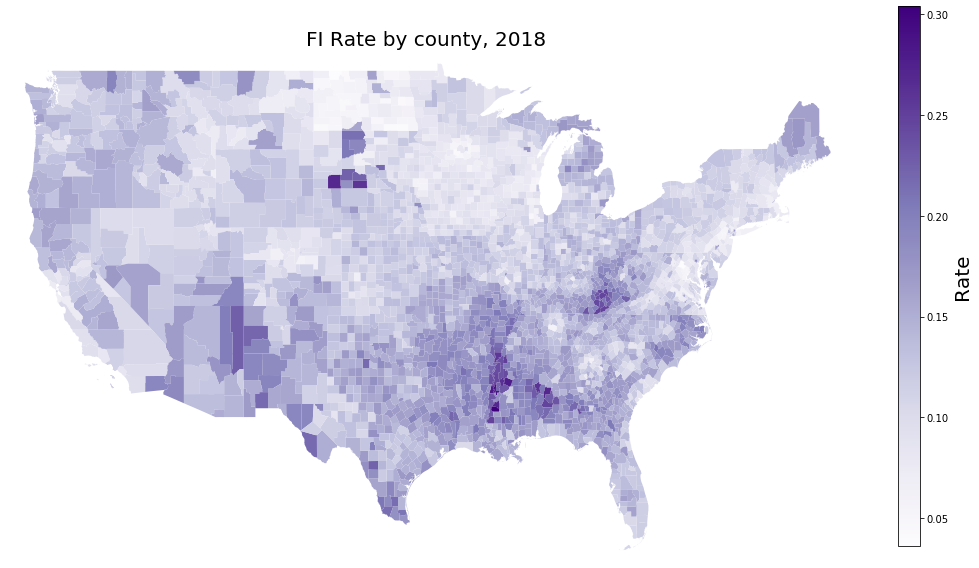

In [63]:
# specify feature to focus on, instantiate figure and axes, then plot
feature = 'FI Rate'
fig, ax = plt.subplots(figsize = (15,15))
vmin = geo_df[feature].min()
vmax = geo_df[feature].max()
geo_df.plot(ax=ax,column = feature,cmap='Purples',legend = False)
ax.set_title("FI Rate by county, 2018", fontdict={'fontsize': 20}, loc='center')
ax.set(xlim=(-126, -66), ylim=(24, 50));
plt.xticks([], [])
plt.yticks([], [])
cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.set_label('Rate', size=20)
cbr.ax.tick_params(labelsize=10) 
ax.set_axis_off()
# ax.annotate("Population in NYC by Zip Code", xy=(0.25, .1), size=20, xycoords='figure fraction')
# plt.savefig('population.png',format = 'png',bbox_inches='tight')

### Wrap it in a function
make a function to produce a choropleth map

In [64]:
def choropleth(df, feature, year, cmap):
    '''sdf '''

    map_df = df[df.Year == year]
    shape_df = gpd.read_file('../datasets/shapefile/cb_2018_us_county_500k.shp')
    geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
    
    fig, ax = plt.subplots(figsize = (15,15))
    vmin = geo_df[feature].min()
    vmax = geo_df[feature].max()
    geo_df.plot(ax=ax, column =feature, cmap=cmap,legend = False)
    ax.set_title(feature+" by county,"+year, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate("Population in NYC by Zip Code", xy=(0.25, .1), size=20, xycoords='figure fraction')
    ax.set(xlim=(-126, -66), ylim=(24, 50));
    plt.xticks([], [])
    plt.yticks([], [])
    cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax)
    cbr.set_label(feature, size=20)
    cbr.ax.tick_params(labelsize=10) 
    ax.set_axis_off()
    # plt.savefig('population.png',format = 'png',bbox_inches='tight')

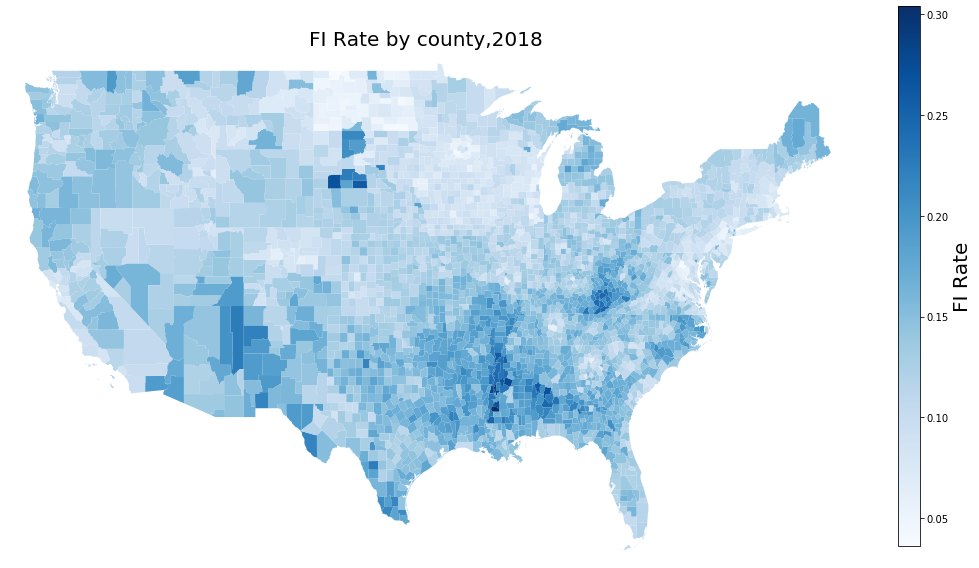

In [65]:
choropleth(df, 'FI Rate', '2018', 'Blues')

# Analysis Question 1: How have features changed over time?

### Food insecurity, averaged by year

In [201]:
to_scale = ['Rent', 'Houseless_rate',
       'Sheltered_rate', 'Unsheltered_rate','TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'TOT_WHITE',
       'TOT_BLACK', 'TOT_NATIVE', 'TOT_ASIAN', 'TOT_PACIFIC',
       'FI Rate', 'Weighted Annual Dollars', 'Cost Per Meal', 'Num_wholesale',
       'Num_restaraunts', 'Num_grocery', 'Total_workforce', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Percent_male', 'Percent_female',
       'Percent_white', 'Percent_Black', 'Percent_native', 'Percent_asian',
       'Percent_pacific', 'Percent_workforce', 'Total_food_retail',
       'Food_retail_per_person']

for feat in to_scale:
    df['scaled_'+feat] = (df[feat] - min(df[feat])) / (max(df[feat]) - min(df[feat]))


### Make function to plot feature(s), averaged by year

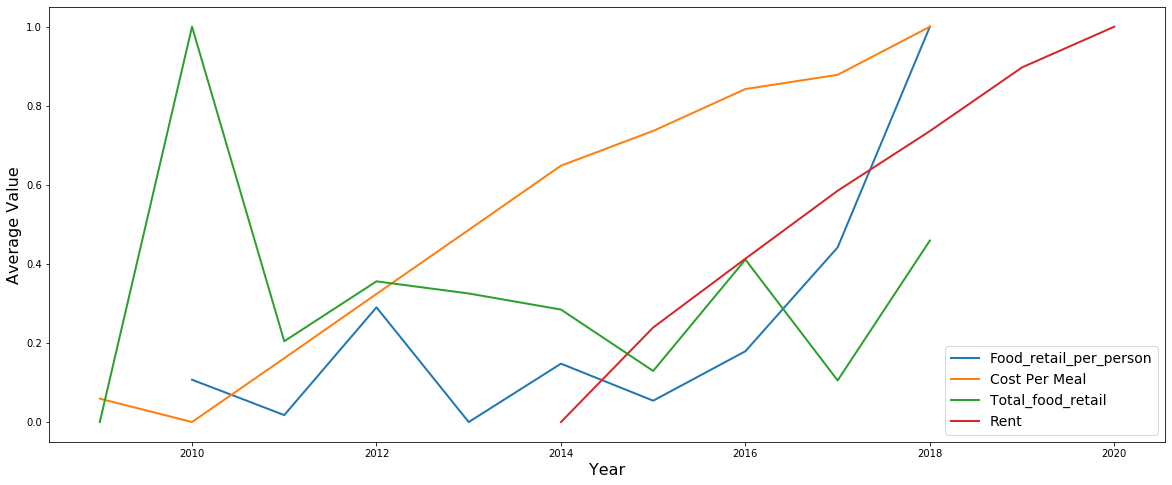

In [206]:
lineplot(df, ['Food_retail_per_person','Cost Per Meal','Total_food_retail','Rent'])


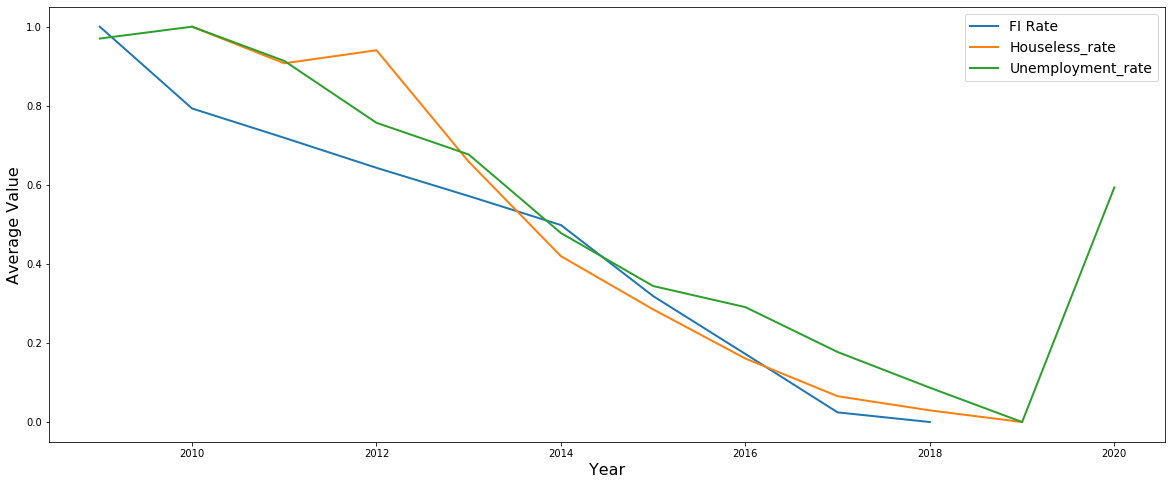

In [207]:
lineplot(df, ['FI Rate','Houseless_rate','Unemployment_rate'])

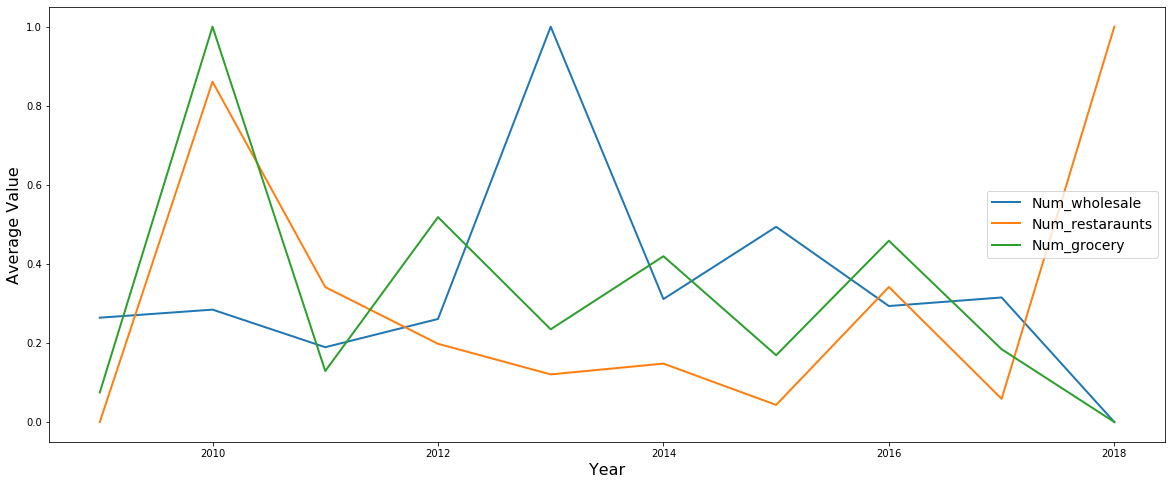

In [200]:
lineplot(df, ['Num_wholesale',
       'Num_restaraunts', 'Num_grocery'])

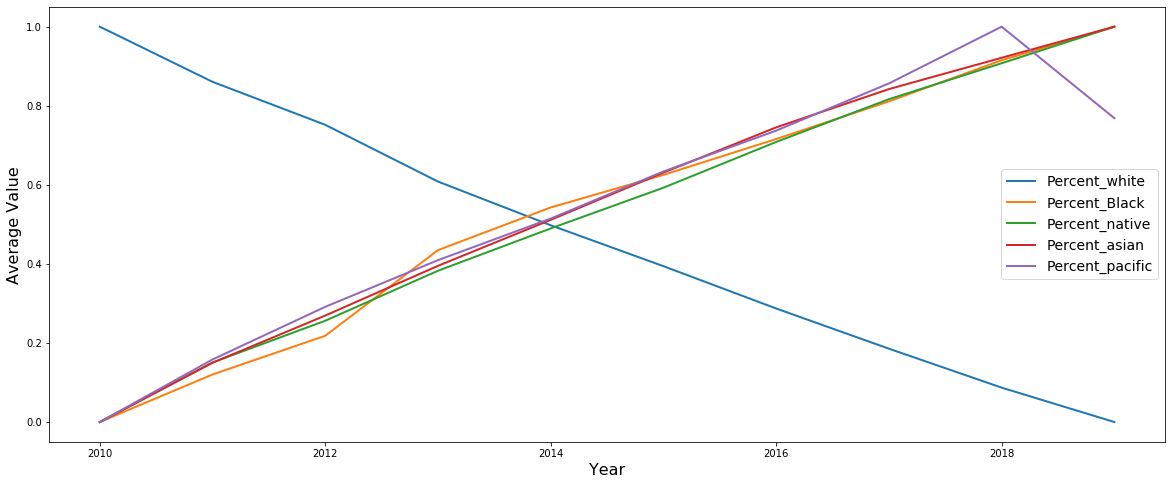

In [203]:
lineplot(df, ['Percent_white', 'Percent_Black', 'Percent_native', 'Percent_asian','Percent_pacific'])

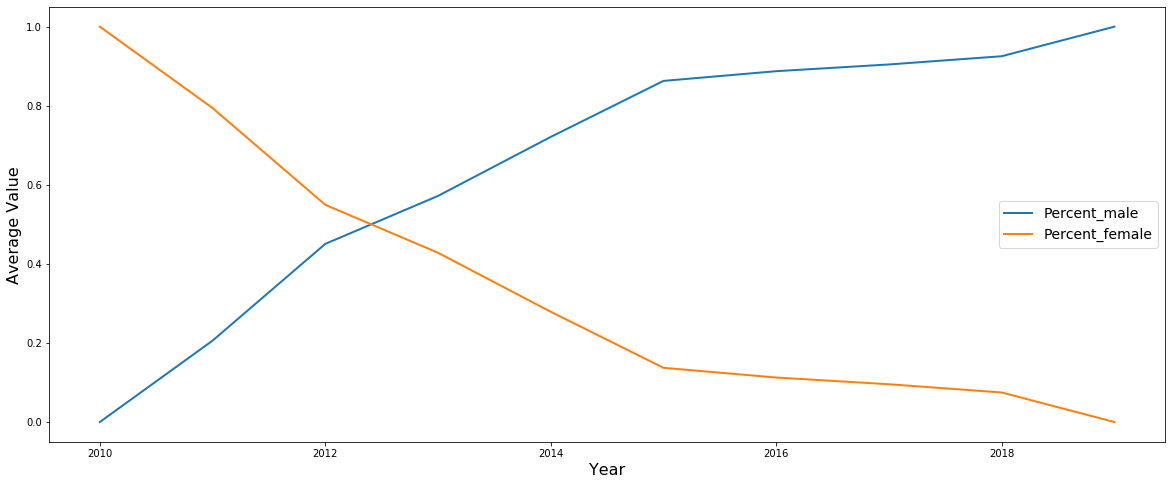

In [205]:
lineplot(df, ['Percent_male', 'Percent_female'])

In [191]:
def lineplot(df, features):

    plt.figure(figsize=(20, 8));

    for feat in features:
        x = df.groupby("Year")[feat].mean().reset_index().dropna()
        y = (x[feat] - min(x[feat])) / (max(x[feat]) - min(x[feat]))
        ax= sns.lineplot(x=x['Year'].astype(int), y= y, label=feat, linewidth = 2, seed=4)

#     ax.set_title(feat+', by year', fontsize=20);
    ax.set_ylabel('Average Value', fontsize=16);
    ax.set_xlabel('Year', fontsize=16);
    ax.legend(prop=dict(size=14));


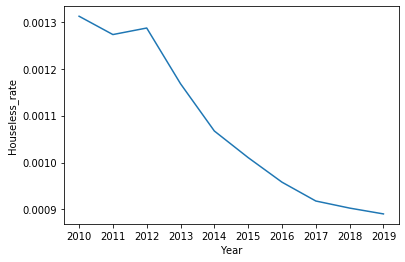

In [93]:
sns.lineplot(y=h['Houseless_rate'], x=h['Year']);

# Analysis Question 2: Which geographic areas have the highest rates of unemployment, houselessness, food insecurity?

# How does food insecurity rate relate to each of the other features?